In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math

# Question 3 - Part 1

In [3]:
df = pd.read_csv("data/dataset_3.csv")
df

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
df=df.fillna(df['A'].mean())
df

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,246.72,0,0


In [5]:
df = df.sample(frac=1,random_state=0).reset_index(drop=True)
df

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,7896,2010,11,25,23,168.0,-10,-3.0,1024.0,NW,1.79,0,0
1,26722,2013,1,18,9,82.0,-12,-8.0,1029.0,NW,6.26,0,0
2,26930,2013,1,27,1,307.0,-8,-5.0,1030.0,NE,0.89,0,0
3,42498,2014,11,6,17,6.0,-13,9.0,1030.0,NE,59.90,0,0
4,38405,2014,5,20,4,197.0,15,18.0,1003.0,NW,1.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,30404,2013,6,20,19,77.0,17,27.0,1008.0,SE,14.76,0,0
43820,21244,2012,6,4,3,140.0,16,16.0,1005.0,cv,1.78,0,0
43821,42614,2014,11,11,13,17.0,-5,13.0,1017.0,NW,63.04,0,0
43822,43568,2014,12,21,7,9.0,-19,-5.0,1030.0,NW,369.22,0,0


In [6]:
target=df['month']
features=df[['year','day','hour','A','B','C','D','E','F','G','H']]
one_hot_features=pd.get_dummies(features)
one_hot_features.columns

Index(['year', 'day', 'hour', 'A', 'B', 'C', 'D', 'F', 'G', 'H', 'E_NE',
       'E_NW', 'E_SE', 'E_cv'],
      dtype='object')

In [7]:
def splitting(features,target,t):
  splitting_index= int(t * features.shape[0])
  train_X=features[0:splitting_index]
  train_y=target[0:splitting_index]
  test_X=features[splitting_index:]
  test_y= target[splitting_index:]
  return train_X,train_y,test_X,test_y

In [8]:
train_X,train_y,test_X,test_y=splitting(one_hot_features,target,0.75)

In [9]:
tree_gini=DecisionTreeClassifier(random_state=0,criterion='gini')
tree_gini.fit(train_X,train_y)
tree_gini.score(test_X,test_y)

0.8242971887550201

In [ ]:
tree_entropy=DecisionTreeClassifier(random_state=0,criterion='entropy')
tree_entropy.fit(train_X,train_y)
tree_entropy.score(test_X,test_y)

0.83442862358525

# Question 3 - Part 2

In [10]:
depth=[2, 4, 8, 10, 12, 30]
test_ac=[]
training_ac=[]
for x in depth:
  tree_entropy=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=x)
  tree_entropy.fit(train_X,train_y)
  
  test_ac.append(tree_entropy.score(test_X,test_y))
  training_ac.append(tree_entropy.score(train_X,train_y))
  print('Depth',x,'Training Accuracy',tree_entropy.score(train_X,train_y),'test Accuracy',tree_entropy.score(test_X,test_y),sep='\t')



Depth	2	Training Accuracy	0.2745223317512474	test Accuracy	0.279390288426433
Depth	4	Training Accuracy	0.39682974321528536	test Accuracy	0.4028842643300475
Depth	8	Training Accuracy	0.5780090057198491	test Accuracy	0.5594194961664841
Depth	10	Training Accuracy	0.7019897772909821	test Accuracy	0.6579956188389924
Depth	12	Training Accuracy	0.8217719362297675	test Accuracy	0.7383169039795546
Depth	30	Training Accuracy	1.0	test Accuracy	0.83442862358525


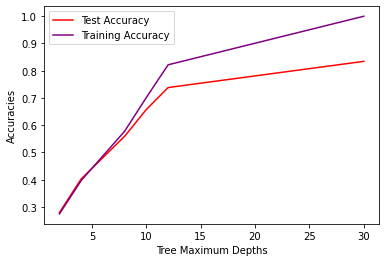

In [11]:
plt.plot(depth,test_ac,label='Test Accuracy',color='red')
plt.plot(depth,training_ac,label='Training Accuracy',color='purple')
plt.xlabel('Tree Maximum Depths')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

# Question 3 - Part 3

In [12]:
tree_set=[]
for x in range(0,150,1):
  random_indices=np.random.choice(train_X.shape[0],int(train_X.shape[0]*0.4))
  train_40x=train_X.to_numpy()[random_indices]
  train_40y=train_y.to_numpy()[random_indices]
  tree_entropy=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=4)
  tree_entropy.fit(train_40x,train_40y)
  tree_set.append(tree_entropy)

In [13]:
def predict(tree_set,test_X):
  l=[]
  for x in tree_set:
    l.append(x.predict(test_X))

  l=np.array(l)
  final=[]
  for x in range(0,test_X.shape[0],1):
    final.append(np.argmax(np.bincount(l[:,x])))
  final=np.array(final)
  return final

In [14]:
def accuracy(expected,predicted):
  correct_predictions=expected == predicted
  cp_sum=correct_predictions.sum()
  accuracy= cp_sum/expected.shape[0]
  return accuracy

In [15]:
accuracy(test_y.to_numpy(),predict(tree_set,test_X))

0.412833150784958

In [16]:
depth=[5, 7, 13, 15, 25,30]
numtree=[25,50,75,100,125,150,175,200]
trees=[]
for t in numtree:
  for d in depth:
    for x in range(0,t,1):
      random_indices=np.random.choice(train_X.shape[0],int(train_X.shape[0]*0.4))
      train_40x=train_X.to_numpy()[random_indices]
      train_40y=train_y.to_numpy()[random_indices]
      tree_entropy=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=d)
      tree_entropy.fit(train_40x,train_40y)
      trees.append(tree_entropy)

    testacc = accuracy(test_y.to_numpy(),predict(trees,test_X))
    trainacc = accuracy(train_y.to_numpy(),predict(trees,train_X))
    print('Num trees',t,'depth',d,'Training Accuracy',trainacc,'Test Accuracy',testacc,sep='\t')

Num trees	25	depth	5	Training Accuracy	0.46373372276986735	Test Accuracy	0.4589266155531216
Num trees	25	depth	7	Training Accuracy	0.5370573201898503	Test Accuracy	0.5234574662285506
Num trees	25	depth	13	Training Accuracy	0.7133686260192285	Test Accuracy	0.6531580868930267
Num trees	25	depth	15	Training Accuracy	0.8407873919922113	Test Accuracy	0.7475355969331873
Num trees	25	depth	25	Training Accuracy	0.9048618717293416	Test Accuracy	0.8042168674698795
Num trees	25	depth	30	Training Accuracy	0.9399111597906779	Test Accuracy	0.8295910916392845
Num trees	50	depth	5	Training Accuracy	0.8378361932578801	Test Accuracy	0.7389558232931727
Num trees	50	depth	7	Training Accuracy	0.7906170135085798	Test Accuracy	0.707101131799927
Num trees	50	depth	13	Training Accuracy	0.8495192892783254	Test Accuracy	0.759127418765973
Num trees	50	depth	15	Training Accuracy	0.8922964585615188	Test Accuracy	0.7925337714494342
Num trees	50	depth	25	Training Accuracy	0.9217780211756116	Test Accuracy	0.8191858342

KeyboardInterrupt: 